In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [5]:
# Load Data
df = pd.read_csv("ghee.csv")  
print(df.head())


                                              Review
0  it's horrible ghee. it's definitely adultered....
1  We had placed order packing BLUE COLOUR and re...
2  I don't like the product and suggest not to bu...
3                                          Excellent
4                                               Good


In [7]:
# Preprocessing Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text

df['cleaned_reviews'] = df['Review'].apply(clean_text)

In [9]:
# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prachethanmallemula/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Sentiment Analysis
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])


/var/folders/8d/w_gnrm152kzg7cqf0lg3xr3w0000gn/T/ipykernel_28357/3348733437.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='coolwarm')


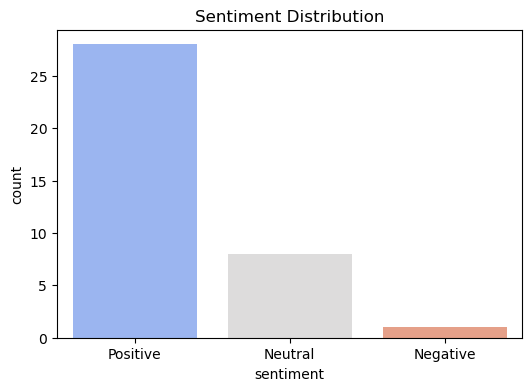

In [11]:
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')
# 1. **Sentiment Distribution**
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

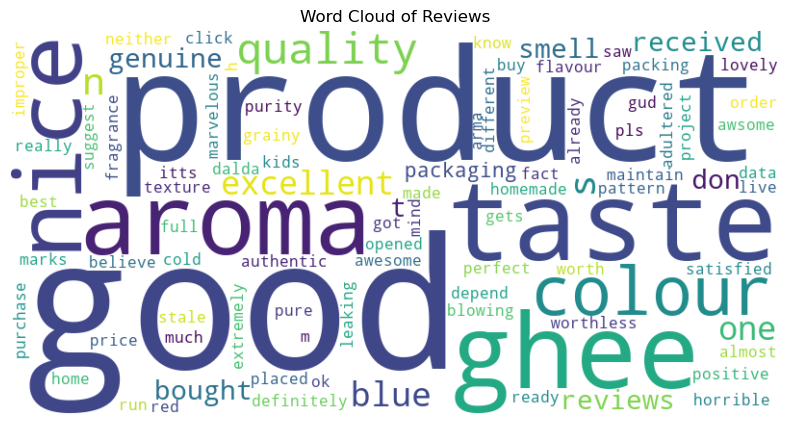

In [13]:
# 2. **Word Cloud**
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_reviews']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()


/var/folders/8d/w_gnrm152kzg7cqf0lg3xr3w0000gn/T/ipykernel_28357/2764291735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=word_freq, palette='viridis')


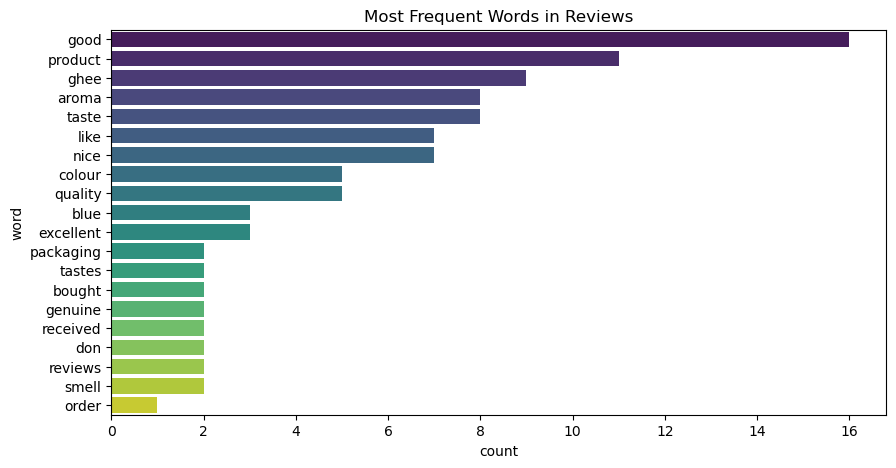

In [15]:
# 3. **Keyword Frequency Analysis**
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])
word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': np.asarray(X.sum(axis=0)).ravel()})
word_freq = word_freq.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(10,5))
sns.barplot(x='count', y='word', data=word_freq, palette='viridis')
plt.title('Most Frequent Words in Reviews')
plt.show()


In [17]:
# 5. **Topic Modeling (LDA)**
num_topics = 3  # Adjust as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
X_topics = lda.fit_transform(X)

terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: ", [terms[i] for i in topic.argsort()[:-6:-1]])

Topic 1:  ['good', 'taste', 'product', 'aroma', 'like']
Topic 2:  ['nice', 'like', 'excellent', 'bought', 'reviews']
Topic 3:  ['product', 'ghee', 'quality', 'aroma', 'taste']


In [19]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [21]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /Users/arya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Ensure the dataframe exists
if 'df' not in locals():
    raise ValueError("The dataframe 'df' is not defined. Please load your dataset first.")

# Check if 'sentiment' column exists
if 'sentiment' not in df.columns:
    raise KeyError("The column 'sentiment' is missing from the dataset. Check the column names using df.columns")

# Filter negative reviews
negative_reviews = df[df['sentiment'] == 'Negative']

# Ensure there are negative reviews before proceeding
if negative_reviews.empty:
    raise ValueError("No negative reviews found in the dataset.")

# Convert to text
all_negative_text = " ".join(negative_reviews['Review'].astype(str))

# Print a sample to verify
print(all_negative_text[:500])  # Show first 500 characters of negative reviews


# Combine all negative reviews into one text
all_negative_text = " ".join(negative_reviews['Review'].astype(str))


No ghee aroma.


In [25]:
# Tokenize and remove stopwords
words = word_tokenize(all_negative_text.lower())
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]


In [27]:
# Count word frequency
word_freq = Counter(filtered_words)
top_words = dict(word_freq.most_common(20))  # Get top 20 words


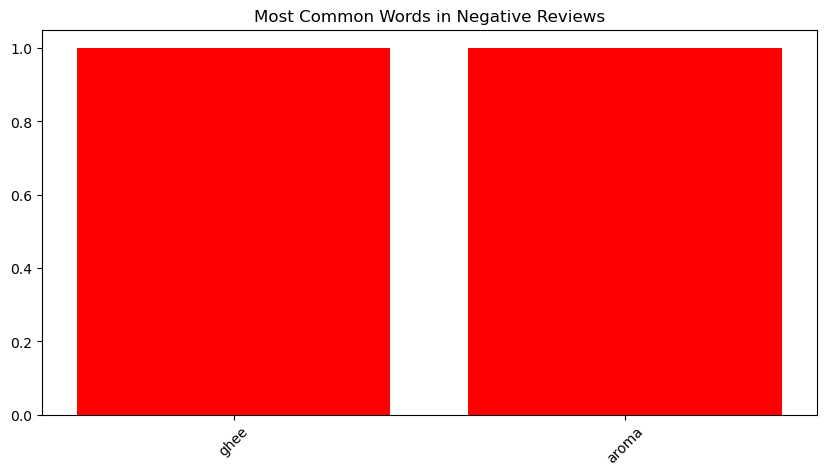

In [29]:
# Plot bar chart
plt.figure(figsize=(10,5))
plt.bar(top_words.keys(), top_words.values(), color='red')
plt.xticks(rotation=45)
plt.title("Most Common Words in Negative Reviews")
plt.show()


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
